# Sentiment Analysis

In [20]:
# Import_Useful_Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from textblob import TextBlob
import re
import string
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from cleantext import clean as cleaner

In [2]:
# Read_Customer_Reviews_Dataset
data=pd.read_excel('C:\\Users\\imnab\\Downloads\\amazon-mobile-phones-reviews-QueryResult.xlsx')

### Data_Preprocessing

#### First, I am gonna explore the datasets.

In [3]:
data.head()

,product,product_company,profile_name,review_title,review_rating,review_text,helpful_count,total_comments,review_country,reviewed_at,url,crawled_at,id,verified_purchase,color,style_name,size_name,category,sub_category,images
0,"OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Sto...",OnePlus,Nikhil,*Read before you buy!!*,5.0 out of 5 stars,"\n Yea..pre-ordered on 28 July, got it on 4 A...",721 people found this helpful,3,India,4 August 2020,https://www.amazon.in/product-reviews/B08695ZS...,1603020227000,45ca015a-2e39-5650-a174-ba966dd1e51f,Verified Purchase,Marble Blue,8GB RAM + 128GB Storage,na,electronics,mobiles,"[""https://images-na.ssl-images-amazon.com/imag..."
1,"OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Sto...",OnePlus,Amit,Near to mid range Perfection,5.0 out of 5 stars,"\n Got it delivered yesterday , used for abou...",436 people found this helpful,1,India,3 August 2020,https://www.amazon.in/product-reviews/B08695ZS...,1603020227000,6820f8ae-f3cd-5783-b826-5e5805376047,Verified Purchase,na,na,na,electronics,mobiles,[]
2,"OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Sto...",OnePlus,aishwarya,Great price!,5.0 out of 5 stars,\n An amazing phone!,322 people found this helpful,1,India,4 August 2020,https://www.amazon.in/product-reviews/B08695ZS...,1603020227000,bea91c43-8d65-5ef5-ab04-595a5f5cc542,Verified Purchase,na,na,na,electronics,mobiles,"[""https://images-na.ssl-images-amazon.com/imag..."
3,"OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Sto...",OnePlus,vasu a.,Beast in OnePlus.,5.0 out of 5 stars,\n Brilliant..,243 people found this helpful,7,India,2 August 2020,https://www.amazon.in/product-reviews/B08695ZS...,1603020227000,76f68b53-5c52-56b2-9727-a5ab8c4bb4ff,Verified Purchase,na,na,na,electronics,mobiles,"[""https://images-na.ssl-images-amazon.com/imag..."
4,"OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Sto...",OnePlus,Amazon Customer,Changed to Nord from 6t,5.0 out of 5 stars,\n I was skeptical about changing from One pl...,109 people found this helpful,2,India,4 August 2020,https://www.amazon.in/product-reviews/B08695ZS...,1603020227000,22228681-b884-56a1-b04e-87167f6f76e6,Verified Purchase,na,na,na,electronics,mobiles,[]


In [4]:
data.shape

(5000, 20)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   product            5000 non-null   object
 1   product_company    5000 non-null   object
 2   profile_name       5000 non-null   object
 3   review_title       4998 non-null   object
 4   review_rating      5000 non-null   object
 5   review_text        5000 non-null   object
 6   helpful_count      5000 non-null   object
 7   total_comments     5000 non-null   int64 
 8   review_country     5000 non-null   object
 9   reviewed_at        5000 non-null   object
 10  url                5000 non-null   object
 11  crawled_at         5000 non-null   int64 
 12  id                 5000 non-null   object
 13  verified_purchase  5000 non-null   object
 14  color              5000 non-null   object
 15  style_name         5000 non-null   object
 16  size_name          5000 non-null   object


#### Next, we need to download several dictionary needed to analyse the comment.

In [7]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\imnab\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\imnab\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#### Next, I am gonna analyse the sentiment of the comment of each product. However, the data is still a mess, so I am gonna clean it by removing punctuation and symbols by defining its function as clean_text.

In [8]:
default_stemmer = PorterStemmer()
default_stopwords = stopwords.words(
    'english')  # or any other list of your choice


def clean_text(text, ):
    def tokenize_text(text):
        return [w for s in sent_tokenize(text) for w in word_tokenize(s)]

    def remove_special_characters(text,
                                  characters=string.punctuation.replace(
                                      '-', '')):
        tokens = tokenize_text(text)
        pattern = re.compile('[{}]'.format(re.escape(characters)))
        return ' '.join(filter(None, [pattern.sub('', t) for t in tokens]))

    def remove_stopwords(text, stop_words=default_stopwords):
        tokens = [w for w in tokenize_text(text) if w not in stop_words]
        return ' '.join(tokens)

    text = text.strip(' ')  # strip whitespaces
    text = text.lower()  # lowercase
    text = remove_special_characters(text)  # remove punctuation and symbols
    #text.strip(' ') # strip whitespaces again?

    return text

#### After defining the function to clean the data, I am gonna define a function to decide the sentiment of each comment.

In [9]:
def isNaN(num):
    return num != num


def sentimen_en(text):
    if isNaN(text) == True:
        return np.nan
    else:
        hasil = TextBlob(text).sentiment[0]
        return hasil

#### After defining the function, let's clean the data and analyse its sentiment.

In [10]:
data['clean'] = data['review_title'].apply(lambda x: clean_text(cleaner(x)))

In [11]:
data['sentimen'] = data['clean'].apply(lambda x: sentimen_en(x))

In [12]:
mask = data['review_title'].apply(lambda x: not isNaN(x))

#### We can see below the score of each comment from -1 to 1.

In [13]:
data[mask][['clean', 'sentimen']].sample(10)

,clean,sentimen
1916,very good phone,0.910000
4041,nord best,1.000000
4677,very good,0.910000
4300,nice one,0.600000
3405,awsm,0.000000
1546,it is best mobile under 30 k,1.000000
4551,over all super,0.333333
4308,5g,0.000000
2931,phone volume button up and downing automatically,0.000000
3555,45 star,0.000000


#### Next, we gonna need to categorize each sentiment, to decide which sentiment is positive, neutral, or negative.

In [14]:
bins = [-1, -0.3, 0.3, 1]
labels = ['negative', 'unsure', 'positive']
data['sentimen_label'] = pd.cut(data['sentimen'], bins=bins, labels=labels)

#### After several process, we can see the comment is categorized by the sentiment score.

In [15]:
data[mask].groupby('sentimen_label').apply(lambda x: x.sample(10))[[
    'clean', 'sentimen'
]]

clean  \
sentimen_label                                                           
negative       918                               front cam is not good   
               1730                               performance addicted   
               4862              do nt listen to dumb tech influencers   
               4856  my expectations for this phone gone into disap...   
               3047                                   disappointed one   
               3968                                          bad phone   
               3150                                       poor battery   
               1999                                  price is not good   
               4887                              slightly disappointed   
               394                  if you are a casual user go for it   
unsure         3153                          bill not received on mail   
               1640                                         go for it🖤   
               2564                                      one plus nord   
               1373                                           must buy   
               250   a decent purchase if you are buying a oneplus ...   
               2568  overall best in mid range battery drain fast o...   
               4108                                            oneplus   
               3301  phone performance is super but the battery per...   
               3945                                       as expected👍   
               4990                                            average   
positive       2004                                         good phone   
               3182                                       overall best   
               4701                                        great phone   
               1623                                 love for oxygen os   
               4884             smooth snappy - happy with the product   
               4663                                             nice 👍   
               606                        wonderful product by oneplus   
               1265                                            love it   
               4447                                               best   
               4419                                       nice product   

                     sentimen  
sentimen_label                 
negative       918  -0.350000  
               1730 -0.400000  
               4862 -0.375000  
               4856 -0.600000  
               3047 -0.750000  
               3968 -0.700000  
               3150 -0.400000  
               1999 -0.350000  
               4887 -0.750000  
               394  -0.500000  
unsure         3153  0.000000  
               1640  0.000000  
               2564  0.000000  
               1373  0.000000  
               250   0.208333  
               2568  0.300000  
               4108  0.000000  
               3301  0.083333  
               3945  0.000000  
               4990 -0.150000  
positive       2004  0.700000  
               3182  0.500000  
               4701  0.800000  
               1623  0.500000  
               4884  0.600000  
               4663  0.600000  
               606   1.000000  
               1265  0.500000  
               4447  1.000000  
               4419  0.600000

#### As the table shown above, we can see that the category is quite accurate. Moreover, we gonna analyse the negative comment further.

In [16]:
data_sample_negative = data[mask][data['sentimen_label'] == "negative"].sample(
    42)

<ipython-input-16-58a17f57ea06>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_sample_negative = data[mask][data['sentimen_label'] == "negative"].sample(


#### To see which word or topic that connected with negative sentiment, we gonna visualize it with word cloud and see which word that describe the negative comment the most.

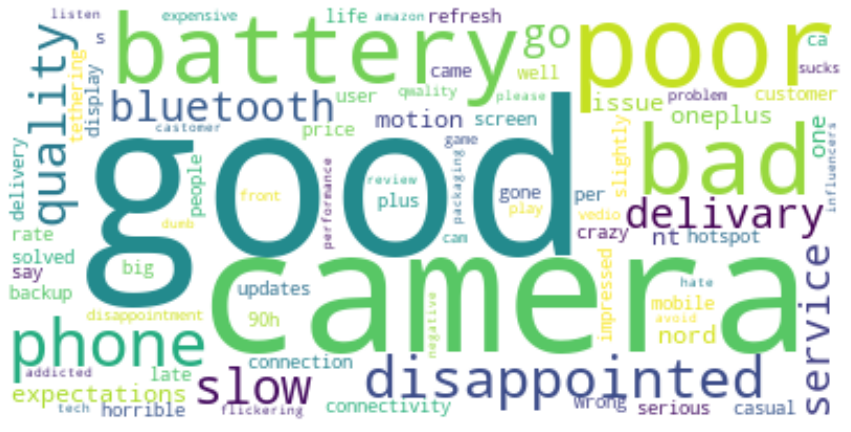

In [23]:
# Wordcloud
text = " ".join(text for text in data_sample_negative['clean'])
stopwords = set(STOPWORDS)
stopwords.update(
    ['still', 'come', 'na', 'bought', 'buy', 'made', 'got', 'base',
     'already'])  #Adding Stopword

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.rcParams["figure.figsize"] = (15, 8)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### From the wordcloud above, we can analyse that most of negative comments are about the battery, camera, delivery, etc. This could be the company feedbacks to improve the company, especially in battery, camera, and qauality.

# Conclusion

#### By analyzing the sentiment of the comment, this can be the company consideration to improve their market. Since I only focusing on the negative sentiment, I recommend for the company to:

#### 1) Make a powefull battery since it is the most customer concern
#### 2) Improve your camera performence since it is the second most customer concern
#### 3) Check your delivery and service performence, it may has problems since the customer mentioned it frequently.